# Módulo 07, Tarefa 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = 'demo01.csv'
df = pd.read_csv(data)

In [96]:
# Avaliar as variáveis e tipos de dados de cada variável
print(df.dtypes)
print(df.head())

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                         bool
dtype: object
  sexo posse_de_veiculo posse_de_imovel  qtd_filhos            tipo_renda  \
0    M                Y               Y           0               Working   
1    F                N               Y           0  Commercial associate   
2    F                N               Y           0  Commercial associate   
3    M                Y               Y           0               Working   
4    F                Y               N           0               Working

In [98]:
# Verificar a quantidade de valores missings
print(df.isna().sum())

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64


In [100]:
# Analisar a distribuição da variável resposta ('mau')
print(df['mau'].describe())
print('\n\n')
print(df['mau'].value_counts())

count     16650
unique        2
top       False
freq      16260
Name: mau, dtype: object



mau
False    16260
True       390
Name: count, dtype: int64


<Axes: xlabel='mau', ylabel='count'>

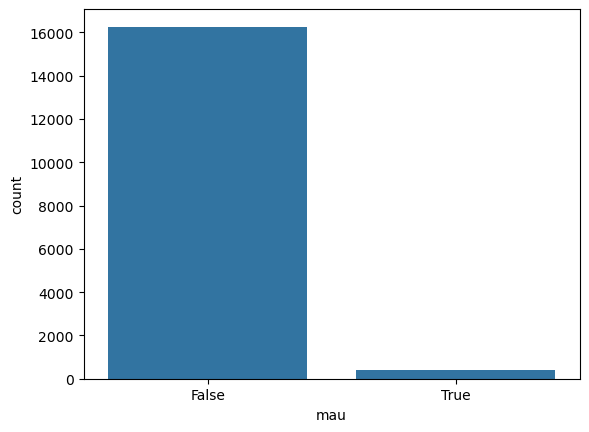

In [102]:
sns.countplot(x = 'mau', data = df)

#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável.
    Dica:
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis,
        3. conte o número de categorias dessa variável
        4. acumule essa informação de 3. na lista que você criou em 1.
        5. No final, essa lista pode ser atribuída à nossa variável.

In [104]:
df.columns

Index(['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos',
       'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade',
       'tempo_emprego', 'possui_celular', 'possui_fone_comercial',
       'possui_fone', 'possui_email', 'qt_pessoas_residencia', 'mau'],
      dtype='object')

In [106]:
metadados = pd.DataFrame(df.dtypes, columns=['tipo'])
metadados.reset_index(inplace=True)
metadados.rename(columns={'index': 'variavel'}, inplace=True)
print(metadados)

                 variavel     tipo
0                    sexo   object
1        posse_de_veiculo   object
2         posse_de_imovel   object
3              qtd_filhos    int64
4              tipo_renda   object
5                educacao   object
6            estado_civil   object
7         tipo_residencia   object
8                   idade  float64
9           tempo_emprego  float64
10         possui_celular    int64
11  possui_fone_comercial    int64
12            possui_fone    int64
13           possui_email    int64
14  qt_pessoas_residencia  float64
15                    mau     bool


In [108]:
# Inicie uma lista vazia
qtd_categorias = []

# Itere pelos nomes das variáveis
for coluna in df.columns:
    # Conte o número de categorias (valores únicos) de cada variável
    num_categorias = df[coluna].nunique()
    # Acumule essa informação na lista
    qtd_categorias.append(num_categorias)

# Adicione a lista ao DataFrame de metadados
metadados['qtd_categorias'] = qtd_categorias

print(metadados)

                 variavel     tipo  qtd_categorias
0                    sexo   object               2
1        posse_de_veiculo   object               2
2         posse_de_imovel   object               2
3              qtd_filhos    int64               8
4              tipo_renda   object               5
5                educacao   object               5
6            estado_civil   object               5
7         tipo_residencia   object               6
8                   idade  float64            5298
9           tempo_emprego  float64            3005
10         possui_celular    int64               1
11  possui_fone_comercial    int64               2
12            possui_fone    int64               2
13           possui_email    int64               2
14  qt_pessoas_residencia  float64               9
15                    mau     bool               2


#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [110]:
# Identifique as variáveis que são do tipo "object" (ou "category")
categorical_columns = df.select_dtypes(include=['object']).columns

# Crie variáveis dummy para as variáveis categóricas
df_dummies = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Verifique o novo DataFrame
print(df_dummies)

       qtd_filhos      idade  tempo_emprego  possui_celular  \
0               0  58.832877       3.106849               1   
1               0  52.356164       8.358904               1   
2               0  52.356164       8.358904               1   
3               0  46.224658       2.106849               1   
4               0  29.230137       3.021918               1   
...           ...        ...            ...             ...   
16645           0  54.109589       9.884932               1   
16646           0  43.389041       7.380822               1   
16647           0  30.005479       9.800000               1   
16648           0  30.005479       9.800000               1   
16649           0  33.936986       3.630137               1   

       possui_fone_comercial  possui_fone  possui_email  \
0                          0            0             0   
1                          0            1             1   
2                          0            1             1   
3      

In [112]:
# Verificando se há mais variáveis não numéricas e removendo-as
df_final = df_dummies.select_dtypes(include=['number', 'bool'])
print(df_final)

       qtd_filhos      idade  tempo_emprego  possui_celular  \
0               0  58.832877       3.106849               1   
1               0  52.356164       8.358904               1   
2               0  52.356164       8.358904               1   
3               0  46.224658       2.106849               1   
4               0  29.230137       3.021918               1   
...           ...        ...            ...             ...   
16645           0  54.109589       9.884932               1   
16646           0  43.389041       7.380822               1   
16647           0  30.005479       9.800000               1   
16648           0  30.005479       9.800000               1   
16649           0  33.936986       3.630137               1   

       possui_fone_comercial  possui_fone  possui_email  \
0                          0            0             0   
1                          0            1             1   
2                          0            1             1   
3      

#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

In [116]:
# Criando a tabela cruzada
# Crie uma tabela cruzada básica
tabela_cruzada = pd.crosstab(df_final["possui_email"], df_final["posse_de_veiculo_Y"])

# calcular a média da variável "mau" para cada combinação, você pode fazer isso separadamente
mean_mau = df_final.groupby(["possui_email", "posse_de_veiculo_Y"])["mau"].mean().unstack()


In [118]:
print("Tabela Cruzada de Contagem:")
print(tabela_cruzada)

print("\nMédia da variável 'mau':")
print(mean_mau)

Tabela Cruzada de Contagem:
posse_de_veiculo_Y  False  True 
possui_email                    
0                    9341   5829
1                     837    643

Média da variável 'mau':
posse_de_veiculo_Y     False     True 
possui_email                          
0                   0.024944  0.021788
1                   0.016726  0.024883


De acordo com os resultados indicados da média da variável 'mau', vimos que quando o cliente possui veículo, mas não possui e-mail, ele apresenta uma média maior para a probabilidade de ser um cliente inadimplente.

#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [120]:
df_final.to_csv('demo_dummy01.csv', index = False)
print('Data frame salvo com sucesso!')

Data frame salvo com sucesso!
